In [47]:
#choice: https://gist.github.com/Thomas-Rosenkrans-Vestergaard/dd95e831eb6d71da2796873589b6ab6c
#this should have just been an import from assignemnt6 but smh jupiterbooks had trouble importing...
#you can find the link by inspecting the a-href on the site which gives you the url
import requests
import os
import re
import pandas as pd


#Programatically download the data from the above link.
def download(url, to):
    response = requests.get(url)
    directory = ''.join(re.split('[/\\\]', to)[:-1])
    os.makedirs(directory, exist_ok=True)
    with open(to, "wb") as f:
        f.write(response.content)
        return to

download('https://think.cs.vt.edu/corgis/csv/cars/cars.csv?forcedownload=1', to='temp/cars.csv')
#Import the data into a Pandas dataframe.
data = pd.read_csv(r'temp/cars.csv')
df = pd.DataFrame(data)
#Show the head of the Pandas dataframe.
df.head()

City mpg          Classification          Driveline  \
0        18  Automatic transmission    All-wheel drive   
1        22  Automatic transmission  Front-wheel drive   
2        21     Manual transmission  Front-wheel drive   
3        21  Automatic transmission    All-wheel drive   
4        21  Automatic transmission    All-wheel drive   

                                    Engine Type Fuel Type  Height  \
0          Audi 3.2L 6 cylinder 250hp 236ft-lbs  Gasoline     140   
1  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo  Gasoline     140   
2  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo  Gasoline     140   
3  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo  Gasoline     140   
4  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo  Gasoline     140   

   Highway mpg  Horsepower  Hybrid                          ID  Length  Make  \
0           25         250   False            2009 Audi A3 3.2     143  Audi   
1           28         200   False       2009 Audi A3 2.0 T AT     143  Audi   
2           30         200   False          2009 Audi A3 2.0 T     143  Audi   
3           28         200   False  2009 Audi A3 2.0 T Quattro     143  Audi   
4           28         200   False  2009 Audi A3 2.0 T Quattro     143  Audi   

     Model Year  Number of Forward Gears  Torque  \
0  2009 Audi A3                        6     236   
1  2009 Audi A3                        6     207   
2  2009 Audi A3                        6     207   
3  2009 Audi A3                        6     207   
4  2009 Audi A3                        6     207   

                     Transmission  Width  Year  
0  6 Speed Automatic Select Shift    202  2009  
1  6 Speed Automatic Select Shift    202  2009  
2                  6 Speed Manual    202  2009  
3  6 Speed Automatic Select Shift    202  2009  
4  6 Speed Automatic Select Shift    202  2009

In [152]:
#Linear regression
#Perform linear regression on the downloaded dataset, where y=Highway mpg and x=Horsepower.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt
df_linear = pd.DataFrame({'hmpg':df['Highway mpg'], 'horsepower':df['Horsepower']})
x_train, x_test, y_train, y_test = train_test_split(df_linear.iloc[:, 1:].values, df_linear.iloc[:, :-1].values)
lr = LinearRegression()
lr.fit(x_train, y_train)
x_prediction = lr.predict(x_test)

[[-40.90089072]]


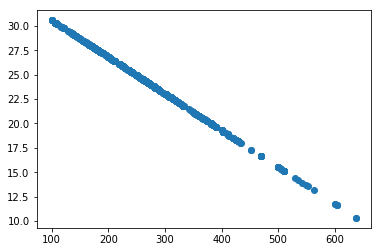

In [151]:
#What is the coefficient (slope) of your model? What does this number mean?
    #it means how many miles pr. galon the car uses depending on the speed

#According to your model, what is y when x=2000.
lookup_val = [[2000]]
specific_pred = lr.predict(lookup_val)
print(specific_pred)
#Show the regression line on a scatterplot with the other datapoints.

In [170]:
#Using sklearn create a classifier that can predict the make of a car, based on provided features. The following features should be included: #City mpg
#Highway mpg
#Height
#Width
#Length
#Horsepower
#Year
from sklearn import tree
data_set = []
make_result = []
for x in range(0, len(df['Highway mpg'])):
    cur_list = [df['Highway mpg'][x], df['Height'][x], df['Width'][x], df['Length'][x], df['Horsepower'][x], df['Year'][x]]
    data_set.append(cur_list)
    make_result.append(df['Make'][x])

x_train, x_test, y_train, y_test = train_test_split(data_set, make_result, test_size=0.4)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

['Honda' 'Nissan' 'Kia' ... 'Volkswagen' 'Toyota' 'GMC']


In [176]:
#Show the decisiontree of your model.
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.518703 to fit



In [178]:
#Use your model to predict the make of a car.
clf_prediction = clf.predict(x_test)
print(clf_prediction)

['Honda' 'Nissan' 'Kia' ... 'Volkswagen' 'Toyota' 'GMC']
